# MNIST Autoencoder
### Directives
* Create the autoencoders using the functional API described below, you can play with the topology, those are just starting points
* Use GPU runtime
* Print 10 inputs and their associated outputs
* Don't forget to normalize your data
* Use the Functional API for Keras

### Autoencoders to build
1. Stacked 784 - 392 - 196 - 392 - 784 (tied weights or not)
2. Convolutional Encoder (conv, maxpool, conv, maxpool, conv, maxpool). Decoder (conv, upsample2d, conv, upsample2d, conv, upsample2d, conv)
3. Optional : GAN or VAE


In [1]:
%tensorflow_version 2.x

from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [7]:
tf.random.set_seed(42)
np.random.seed(42)

input_ = keras.layers.Input(shape=X_train.shape[1:])
input_reshape = keras.layers.Reshape([28, 28, 1], input_shape=X_train.shape[1:])(input_)
hidden1 = keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu")(input_reshape)
hidden2 = keras.layers.MaxPool2D(pool_size=2)(hidden1)
hidden3 = keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu")(hidden2)
hidden4 = keras.layers.MaxPool2D(pool_size=2)(hidden3)
hidden5 = keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu")(hidden4)
hidden6 = keras.layers.MaxPool2D(pool_size=2)(hidden5)
hidden7 = keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64])(hidden6)
hidden8 = keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu")(hidden7)
hidden9 = keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid")(hidden8)
output = keras.layers.Reshape([28, 28])(hidden9)
model = keras.models.Model(inputs=[input_], outputs=[output])
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                metrics=[rounded_accuracy])
history = model.fit(X_train, X_train, epochs=5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1104 - rounded_accuracy: 0.9615
Epoch 2/5
1719/1719 [==============================] - 9s 6ms/step - loss: 0.0813 - rounded_accuracy: 0.9778
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0771 - rounded_accuracy: 0.9807
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0749 - rounded_accuracy: 0.9823
Epoch 5/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0735 - rounded_accuracy: 0.9833


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                         

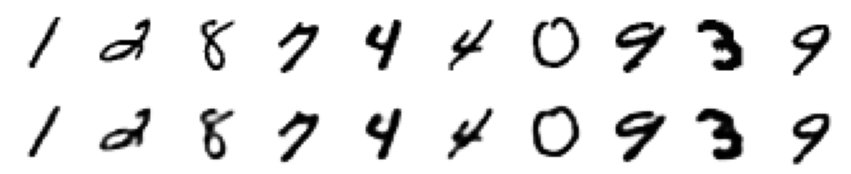

In [9]:
def show_reconstructions(model, images=X_valid, n_images=10):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

show_reconstructions(model)
plt.show()